In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.discriminant_analysis import StandardScaler
from sklearn.model_selection import KFold
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from script import error_bias_variance, plot_metrics, print_metrics


In [3]:
data = np.loadtxt('winequality-red.csv', delimiter=';', skiprows=1)

x = data[:, :-1]
y = data[:, -1]

scaler_x = StandardScaler()
scaler_y = StandardScaler()

x_scaled = scaler_x.fit_transform(x)
#y_scaled = scaler_y.fit_transform(y.reshape(-1,1))
y_scaled = y

x_train, x_test, y_train, y_test = train_test_split(x_scaled, y_scaled, test_size=0.2)

degree = range(1,4)
folds = 2
lambda_values = lambda_values = [0.00001, 0.0001]  

mse_ols_train = np.zeros((len(degree), folds))
mse_ols_test = np.zeros((len(degree), folds))
error_ols_train = np.zeros((len(degree), folds))
error_ols_test = np.zeros((len(degree), folds))
bias_ols_train = np.zeros((len(degree), folds))
bias_ols_test = np.zeros((len(degree), folds))
variance_ols_train = np.zeros((len(degree), folds))
variance_ols_test = np.zeros((len(degree), folds))

mse_ridge_train = np.zeros((len(degree), len(lambda_values), folds))
mse_ridge_test = np.zeros((len(degree), len(lambda_values), folds))
error_ridge_train = np.zeros((len(degree), len(lambda_values), folds))
error_ridge_test = np.zeros((len(degree), len(lambda_values), folds))
bias_ridge_train = np.zeros((len(degree), len(lambda_values), folds))
bias_ridge_test = np.zeros((len(degree), len(lambda_values), folds))
variance_ridge_train = np.zeros((len(degree), len(lambda_values), folds))
variance_ridge_test = np.zeros((len(degree), len(lambda_values), folds))

mse_lasso_train = np.zeros((len(degree), len(lambda_values), folds))
mse_lasso_test = np.zeros((len(degree), len(lambda_values), folds))
error_lasso_train = np.zeros((len(degree), len(lambda_values), folds))
error_lasso_test = np.zeros((len(degree), len(lambda_values), folds))
bias_lasso_train = np.zeros((len(degree), len(lambda_values), folds))
bias_lasso_test = np.zeros((len(degree), len(lambda_values), folds))
variance_lasso_train = np.zeros((len(degree), len(lambda_values), folds))
variance_lasso_test = np.zeros((len(degree), len(lambda_values), folds))

kfold = KFold(n_splits = folds)
fold_num = 0
for train_inds, test_inds in kfold.split(x):

  x_train, x_test = x[train_inds], x[test_inds]
  y_train, y_test = y[train_inds], y[test_inds]

  for deg in degree:

    poly = PolynomialFeatures(degree=deg)
    x_train_poly = poly.fit_transform(x_train)
    x_test_poly = poly.transform(x_test)

    beta_OLS = np.linalg.inv(x_train_poly.T @ x_train_poly) @ x_train_poly.T @ y_train

    y_pred_OLS_train = x_train_poly @ beta_OLS
    y_pred_OLS_test = x_test_poly @ beta_OLS

    mse_ols_train[deg-1, fold_num] = mean_squared_error(y_train, y_pred_OLS_train)
    mse_ols_test[deg-1, fold_num] = mean_squared_error(y_test, y_pred_OLS_test)

    error_train, bias_train, variance_train = error_bias_variance(y_train, y_pred_OLS_train)
    error_test, bias_test, variance_test = error_bias_variance(y_test, y_pred_OLS_test)

    error_ols_train[deg-1, fold_num] = error_train
    error_ols_test[deg-1, fold_num] = error_test
    bias_ols_train[deg-1, fold_num] = bias_train
    bias_ols_test[deg-1, fold_num] = bias_test
    variance_ols_train[deg-1, fold_num] = variance_train
    variance_ols_test[deg-1, fold_num] = variance_test


    lmb_num = 0
    for lmb in lambda_values:

      beta_ridge = np.linalg.inv(x_train_poly.T @ x_train_poly + lmb*np.eye(x_train_poly.shape[1])) @ x_train_poly.T @ y_train
      y_pred_ridge_train = x_train_poly @ beta_ridge
      y_pred_ridge_test = x_test_poly @ beta_ridge

      mse_ridge_train[deg-1, lmb_num, fold_num] = mean_squared_error(y_train, y_pred_ridge_train)
      mse_ridge_test[deg-1, lmb_num, fold_num] = mean_squared_error(y_test, y_pred_ridge_test)

      error_train, bias_train, variance_train = error_bias_variance(y_train, y_pred_ridge_train)
      error_test, bias_test, variance_test = error_bias_variance(y_test, y_pred_ridge_test)

      error_ridge_train[deg-1, lmb_num, fold_num] = error_train
      error_ridge_test[deg-1, lmb_num, fold_num] = error_test
      bias_ridge_train[deg-1, lmb_num, fold_num] = bias_train
      bias_ridge_test[deg-1, lmb_num, fold_num] = bias_test
      variance_ridge_train[deg-1, lmb_num, fold_num] = variance_train
      variance_ridge_test[deg-1, lmb_num, fold_num] = variance_test

      lasso = linear_model.Lasso(lmb, fit_intercept=False)
      lasso.fit(x_train_poly, y_train)
      y_pred_lasso_train = lasso.predict(x_train_poly)
      y_pred_lasso_test = lasso.predict(x_test_poly)

      mse_lasso_train[deg-1, lmb_num, fold_num] = mean_squared_error(y_train, y_pred_lasso_train)
      mse_lasso_test[deg-1, lmb_num, fold_num] = mean_squared_error(y_test, y_pred_lasso_test)
      
      error_train, bias_train, variance_train = error_bias_variance(y_train, y_pred_lasso_train)
      error_test, bias_test, variance_test = error_bias_variance(y_test, y_pred_lasso_test)

      error_lasso_train[deg-1, lmb_num, fold_num] = error_train
      error_lasso_test[deg-1, lmb_num, fold_num] = error_test
      bias_lasso_train[deg-1, lmb_num, fold_num] = bias_train
      bias_lasso_test[deg-1, lmb_num, fold_num] = bias_test
      variance_lasso_train[deg-1, lmb_num, fold_num] = variance_train
      variance_lasso_test[deg-1, lmb_num, fold_num] = variance_test

      lmb_num += 1
  fold_num +=1


/home/ingar/Documents/prosa/fys4155/FYS-STK4155-Project1/.venv/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.670e+02, tolerance: 2.679e+00
  model = cd_fast.enet_coordinate_descent(
/home/ingar/Documents/prosa/fys4155/FYS-STK4155-Project1/.venv/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.672e+02, tolerance: 2.679e+00
  model = cd_fast.enet_coordinate_descent(
/home/ingar/Documents/prosa/fys4155/FYS-STK4155-Project1/.venv/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might

In [11]:
#Calculate the average mse, error, bias and variance

avg_mse_ols_train = np.mean(mse_ols_train, axis=1)
avg_mse_ols_test = np.mean(mse_ols_test, axis=1)
avg_error_ols_train = np.mean(error_ols_train, axis=1)
avg_error_ols_test = np.mean(error_ols_test, axis=1)
avg_bias_ols_train = np.mean(bias_ols_train, axis=1)
avg_bias_ols_test = np.mean(bias_ols_test, axis=1)
avg_variance_ols_train = np.mean(variance_ols_train, axis=1)
avg_variance_ols_test = np.mean(variance_ols_test, axis=1)

avg_mse_ridge_train = np.mean(mse_ridge_train, axis=2)
avg_mse_ridge_test = np.mean(mse_ridge_test, axis=2)
avg_error_ridge_train = np.mean(error_ridge_train, axis=2)
avg_error_ridge_test = np.mean(error_ridge_test, axis=2)
avg_bias_ridge_train = np.mean(bias_ridge_train, axis=2)
avg_bias_ridge_test = np.mean(bias_ridge_test, axis=2)
avg_variance_ridge_train = np.mean(variance_ridge_train, axis=2)
avg_variance_ridge_test = np.mean(variance_ridge_test, axis=2)

avg_mse_lasso_train = np.mean(mse_lasso_train, axis=2)
avg_mse_lasso_test = np.mean(mse_lasso_test, axis=2)
avg_error_lasso_train = np.mean(error_lasso_train, axis=2)
avg_error_lasso_test = np.mean(error_lasso_test, axis=2)
avg_bias_lasso_train = np.mean(bias_lasso_train, axis=2)
avg_bias_lasso_test = np.mean(bias_lasso_test, axis=2)
avg_variance_lasso_train = np.mean(variance_lasso_train, axis=2)
avg_variance_lasso_test = np.mean(variance_lasso_test, axis=2)


In [10]:
print("================================================================================================ \n"
      + "Best polynomial and combination of polynomial and lambda for OLS, Ridge and Lasso regression.\n" 
      + "Based on the average MSE from all folds from cross-validation. \n"
      + "================================================================================================= ")

print('Train cases for OLS')
min_ols_index_train = np.argmin(avg_mse_ols_train)
best_ols_degree_train = degree[min_ols_index_train]
print('Degree ' + str(best_ols_degree_train) + ' gives MSE ' + str(avg_mse_ols_train[min_ols_index_train]) + ' for OLS on training data')

print('Test cases for OLS')
min_ols_index_test = np.argmin(avg_mse_ols_test)
best_ols_degree_test = degree[min_ols_index_test]
print('Degree ' + str(best_ols_degree_test) + ' gives MSE ' + str(avg_mse_ols_test[min_ols_index_test]) + ' for OLS on test data')

print('Train cases for Ridge')
min_ridge_index_train = np.unravel_index(np.argmin(avg_mse_ridge_train), avg_mse_ridge_train.shape)
best_ridge_degree_train = degree[min_ridge_index_train[0]]
best_ridge_lambda_train = lambda_values[min_ridge_index_train[1]]
print('Degree ' + str(best_ridge_degree_train) + ' and lambda ' + str(best_ridge_lambda_train) + ' gives MSE ' + str(avg_mse_ridge_train[min_ridge_index_train[0], min_ridge_index_train[1]]) + ' for Ridge on training data')

print('Test cases for Ridge')
min_ridge_index_test = np.unravel_index(np.argmin(avg_mse_ridge_test), avg_mse_ridge_test.shape)
best_ridge_degree_test = degree[min_ridge_index_test[0]]
best_ridge_lambda_test = lambda_values[min_ridge_index_test[1]]
print('Degree ' + str(best_ridge_degree_test) + ' and lambda ' + str(best_ridge_lambda_test) + ' gives MSE ' + str(avg_mse_ridge_test[min_ridge_index_test[0], min_ridge_index_test[1]]) + ' for Ridge on test data')

print('Train cases for Lasso')
min_lasso_index_train = np.unravel_index(np.argmin(avg_mse_lasso_train), avg_mse_lasso_train.shape)
best_lasso_degree_train = degree[min_lasso_index_train[0]]
best_lasso_lambda_train = lambda_values[min_lasso_index_train[1]]
print('Degree ' + str(best_lasso_degree_train) + ' and lambda ' + str(best_lasso_lambda_train) + ' gives MSE ' + str(avg_mse_lasso_train[min_lasso_index_train[0], min_lasso_index_train[1]]) + ' for Lasso on training data')

print('Test cases for Lasso')
min_lasso_index_test = np.unravel_index(np.argmin(avg_mse_lasso_test), avg_mse_lasso_test.shape)
best_lasso_degree_test = degree[min_lasso_index_test[0]]
best_lasso_lambda_test = lambda_values[min_lasso_index_test[1]]
print('Degree ' + str(best_lasso_degree_test) + ' and lambda ' + str(best_lasso_lambda_test) + ' gives MSE ' + str(avg_mse_lasso_test[min_lasso_index_test[0], min_lasso_index_test[1]]) + ' for Lasso on test data')

Best polynomial and combination of polynomial and lambda for OLS, Ridge and Lasso regression.
Based on the average MSE from all folds from cross-validation. 
Train cases for OLS
Degree 2 gives MSE 0.33832373228653534 for OLS on training data
Test cases for OLS
Degree 1 gives MSE 0.4555787424652865 for OLS on test data
Train cases for Ridge
Degree 3 and lambda 1e-05 gives MSE 0.17514887670906293 for Ridge on training data
Test cases for Ridge
Degree 1 and lambda 0.0001 gives MSE 0.4552694666474346 for Ridge on test data
Train cases for Lasso
Degree 3 and lambda 1e-05 gives MSE 0.3017312429095443 for Lasso on training data
Test cases for Lasso
Degree 1 and lambda 0.0001 gives MSE 0.45262981119095147 for Lasso on test data


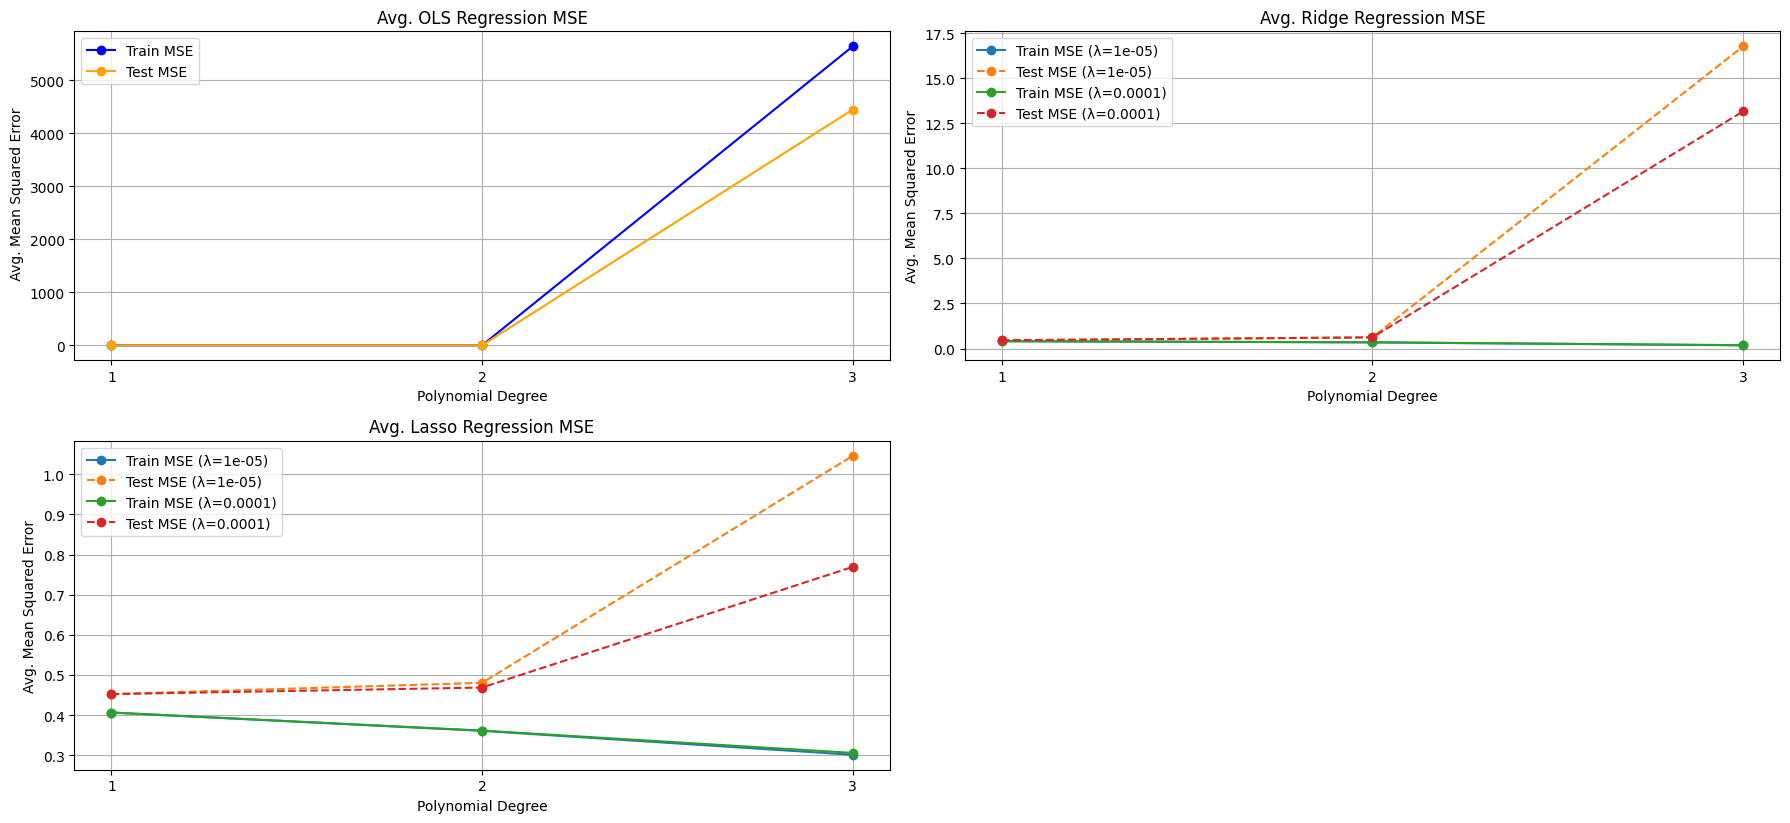

In [6]:
plt.figure(figsize=(18, 12))

plt.subplot(3, 2, 1)
plt.plot(degree, avg_mse_ols_train, marker='o', label='Train MSE', color='blue')
plt.plot(degree, avg_mse_ols_test, marker='o', label='Test MSE', color='orange')
plt.title('Avg. OLS Regression MSE')
plt.xlabel('Polynomial Degree')
plt.ylabel(' Avg. Mean Squared Error')
plt.xticks(degree)
plt.legend()
plt.grid(True)

plt.subplot(3, 2, 2)
for i, lmb in enumerate(lambda_values):
    plt.plot(degree, avg_mse_ridge_train[:, i], marker='o', label=f'Train MSE (λ={lmb})')
    plt.plot(degree, avg_mse_ridge_test[:, i], marker='o', linestyle='--', label=f'Test MSE (λ={lmb})')
plt.title('Avg. Ridge Regression MSE')
plt.xlabel('Polynomial Degree')
plt.ylabel('Avg. Mean Squared Error')
plt.xticks(degree)
plt.legend()
plt.grid(True)

plt.subplot(3, 2, 3)
for i, lmb in enumerate(lambda_values):
    plt.plot(degree, avg_mse_lasso_train[:, i], marker='o', label=f'Train MSE (λ={lmb})')
    plt.plot(degree, avg_mse_lasso_test[:, i], marker='o', linestyle='--', label=f'Test MSE (λ={lmb})')
plt.title('Avg. Lasso Regression MSE')
plt.xlabel('Polynomial Degree')
plt.ylabel('Avg. Mean Squared Error')
plt.xticks(degree)
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


In [15]:
print_metrics("OLS", avg_mse_ols_train, avg_mse_ols_test, avg_error_ols_train, avg_error_ols_test, avg_bias_ols_train, avg_bias_ols_test, avg_variance_ols_train, avg_variance_ols_test, degree, None)

print_metrics("Ridge", avg_mse_ridge_train, avg_mse_ridge_test, avg_error_ridge_train, avg_error_ridge_test, avg_bias_ridge_train, avg_bias_ridge_test, avg_variance_ridge_train, avg_variance_ridge_test, degree, lambda_values)

print_metrics("Lasso", avg_mse_lasso_train, avg_mse_lasso_test, avg_error_lasso_train, avg_error_lasso_test, avg_bias_lasso_train, avg_bias_lasso_test, avg_variance_lasso_train, avg_variance_lasso_test, degree, lambda_values)


Metrics for OLS Model
Degree 1:
  Train MSE: 0.4052, Test MSE: 0.4556
  Train Error: 0.4052, Test Error: 0.4556
  Train Bias: 0.6430, Test Bias: 0.6448
  Train Variance: 0.2379, Test Variance: 0.2493

Degree 2:
  Train MSE: 0.3383, Test MSE: 0.6106
  Train Error: 0.3383, Test Error: 0.6106
  Train Bias: 0.6430, Test Bias: 0.6571
  Train Variance: 0.3047, Test Variance: 0.4126

Degree 3:
  Train MSE: 5639.9433, Test MSE: 4447.9084
  Train Error: 5639.9433, Test Error: 4447.9084
  Train Bias: 74.7255, Test Bias: 131.6402
  Train Variance: 5545.9639, Test Variance: 4294.5379


Metrics for Ridge Model
Degree 1, Lambda 0.0000:
  Train MSE: 0.4052, Test MSE: 0.4555
  Train Error: 0.4052, Test Error: 0.4555
  Train Bias: 0.6430, Test Bias: 0.6447
  Train Variance: 0.2378, Test Variance: 0.2494
Degree 1, Lambda 0.0001:
  Train MSE: 0.4052, Test MSE: 0.4553
  Train Error: 0.4052, Test Error: 0.4553
  Train Bias: 0.6430, Test Bias: 0.6445
  Train Variance: 0.2377, Test Variance: 0.2499

Degree 

Comments:
- scaling y resulted in worse MSE